Traducción a español y tropicalización: Tobias Alexander Santamaria Diaz

Dataset a utilizar:https://www.kaggle.com/datasets/prakharrathi25/banking-dataset-marketing-targets

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn.preprocessing import StandardScaler, OneHotEncoder,MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score,roc_curve, auc,precision_recall_curve, average_precision_score
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt

In [2]:
# Cargar el archivo CSV
file_path = 'bank-additional-full.csv'
data = pd.read_csv(file_path, sep=';')

In [3]:
# Mostrar las primeras filas del dataset
print("Primeras filas del dataset:")
print(data.head())

Primeras filas del dataset:
   age        job  marital    education  default housing loan    contact  \
0   56  housemaid  married     basic.4y       no      no   no  telephone   
1   57   services  married  high.school  unknown      no   no  telephone   
2   37   services  married  high.school       no     yes   no  telephone   
3   40     admin.  married     basic.6y       no      no   no  telephone   
4   56   services  married  high.school       no      no  yes  telephone   

  month day_of_week  ...  campaign  pdays  previous     poutcome emp.var.rate  \
0   may         mon  ...         1    999         0  nonexistent          1.1   
1   may         mon  ...         1    999         0  nonexistent          1.1   
2   may         mon  ...         1    999         0  nonexistent          1.1   
3   may         mon  ...         1    999         0  nonexistent          1.1   
4   may         mon  ...         1    999         0  nonexistent          1.1   

   cons.price.idx  cons.conf

In [4]:
# Información general del dataset
print("\nInformación del dataset:")
print(data.info())


Información del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.

Sin valores nulos: Todas las columnas tienen 41188 valores no nulos, lo que implica que no hay datos faltantes.
Tipos de datos:
5 columnas numéricas (5 enteros y 5 flotantes).
11 columnas categóricas (de tipo object).

In [5]:
# Verificar datos faltantes
print("\nDatos faltantes por columna:")
print(data.isnull().sum())


Datos faltantes por columna:
age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64


In [6]:
# Estadísticas descriptivas
data.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


Estadísticas Descriptivas count: Número de valores no nulos en cada columna. En este caso, todas las columnas tienen 41188 valores no nulos, lo que confirma que no hay valores faltantes en las columnas numéricas.

mean: La media (promedio) de los valores de cada columna.

std: La desviación estándar, que mide la dispersión de los datos alrededor de la media. Un valor alto indica que los datos están más dispersos.

min: El valor mínimo en cada columna.

25%: El primer cuartil, que representa el valor por debajo del cual se encuentra el 25% de los datos.

50%: La mediana (o segundo cuartil), que es el valor central de los datos. Es el punto donde el 50% de los datos están por debajo y el otro 50% están por encima.

75%: El tercer cuartil, que representa el valor por debajo del cual se encuentra el 75% de los datos.

max: El valor máximo en cada columna.

In [7]:
print("\nDistribución de la variable objetivo (y):")
print(data['y'].value_counts())


Distribución de la variable objetivo (y):
y
no     36548
yes     4640
Name: count, dtype: int64


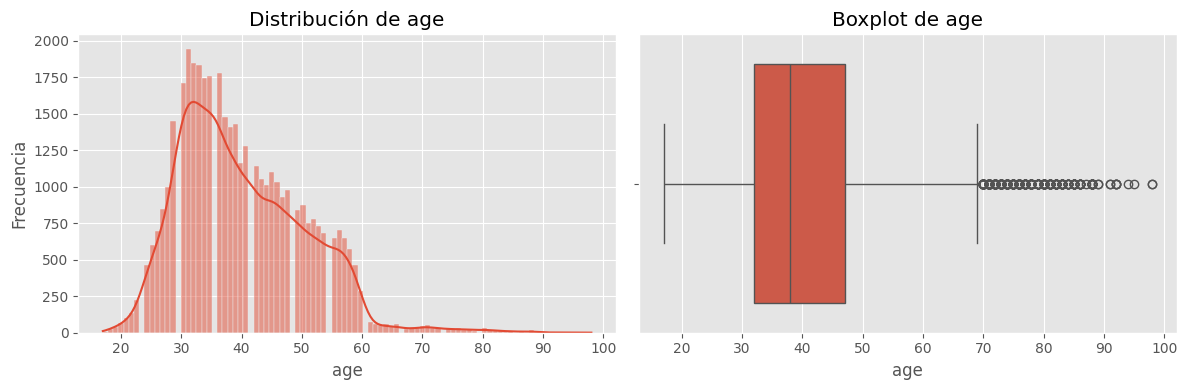

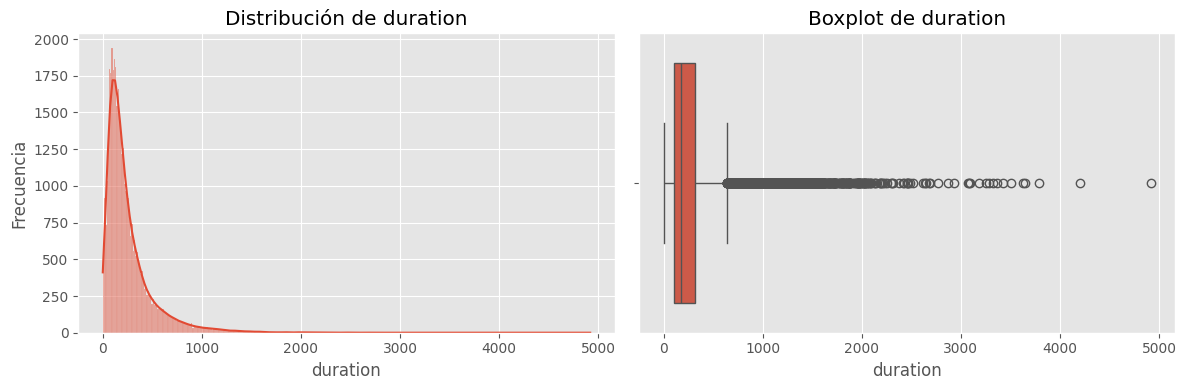

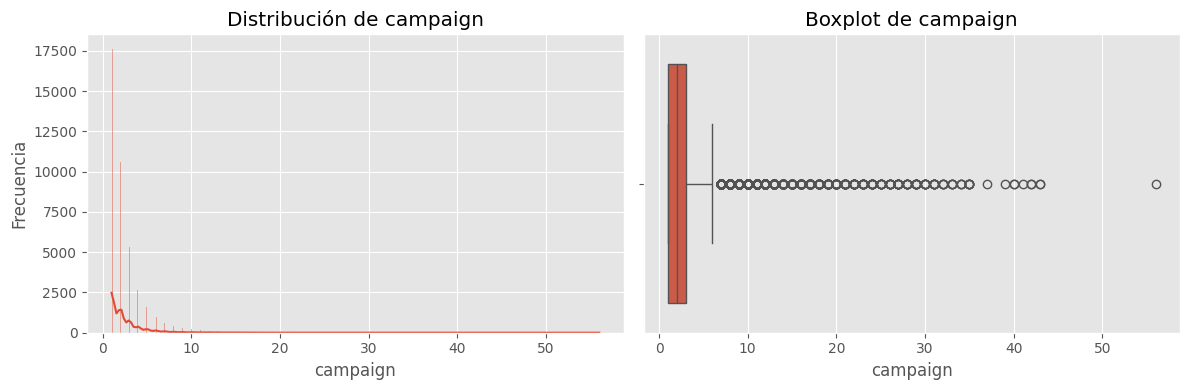

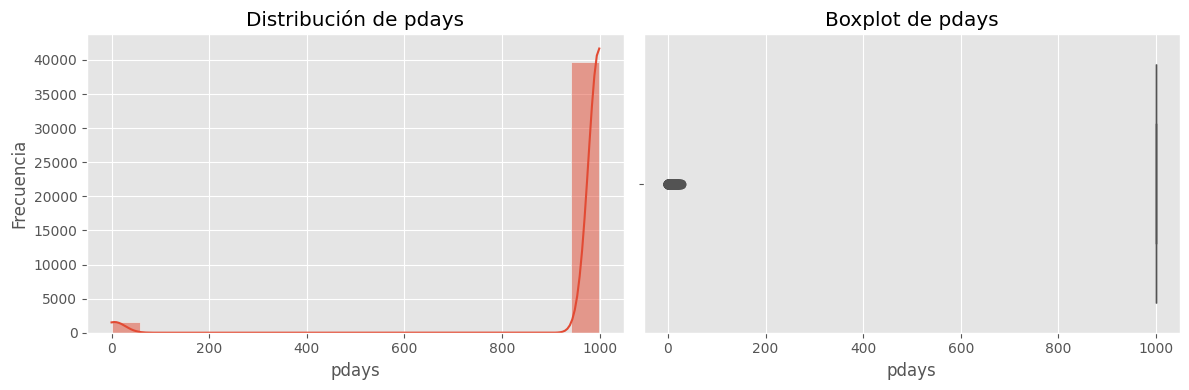

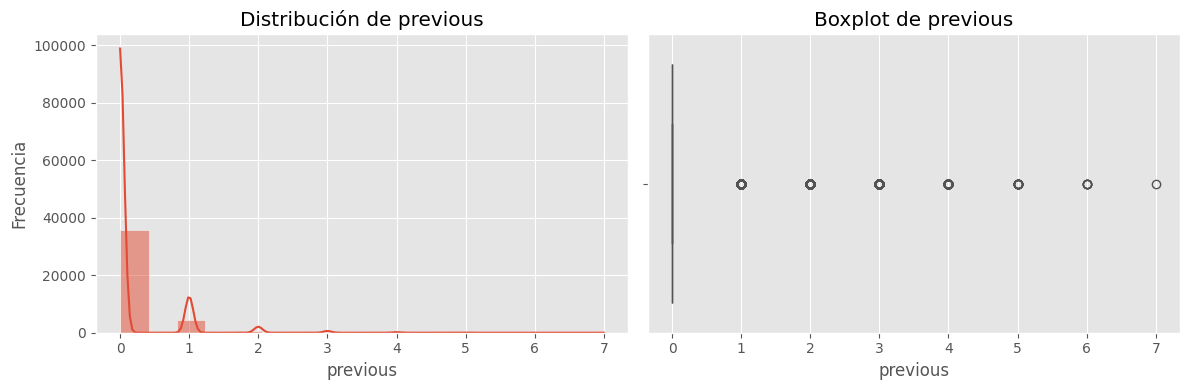

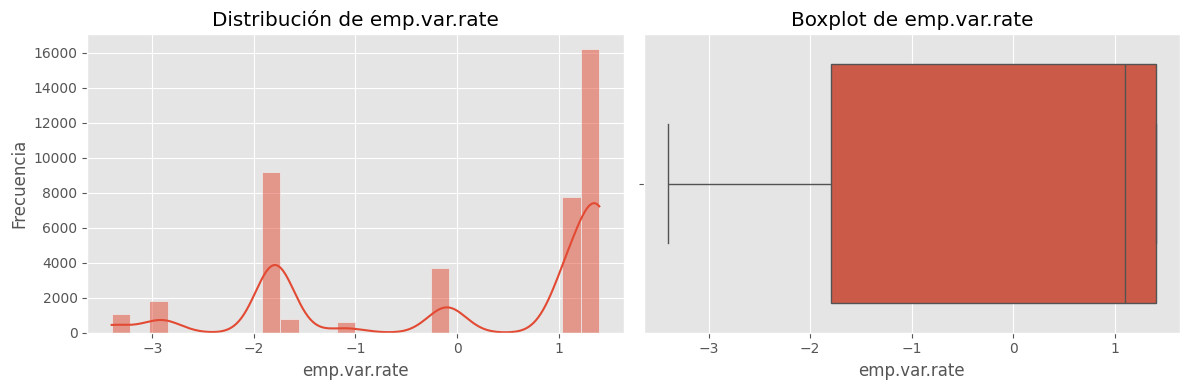

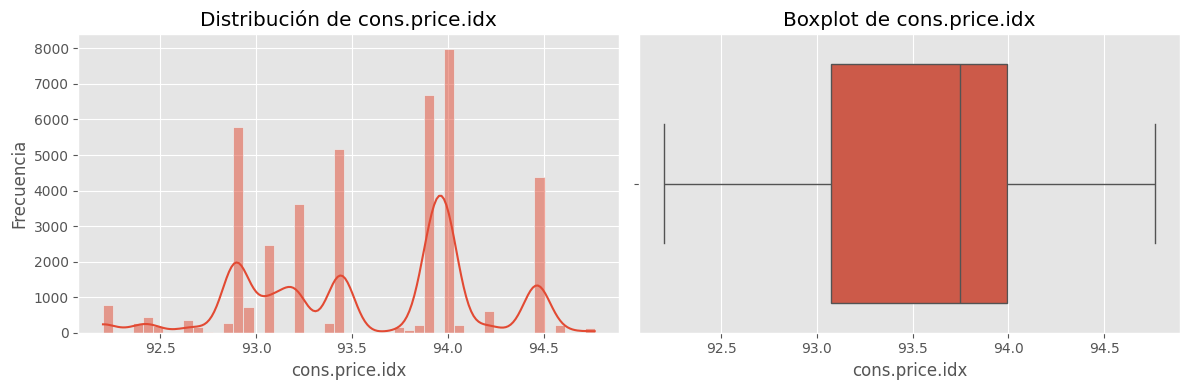

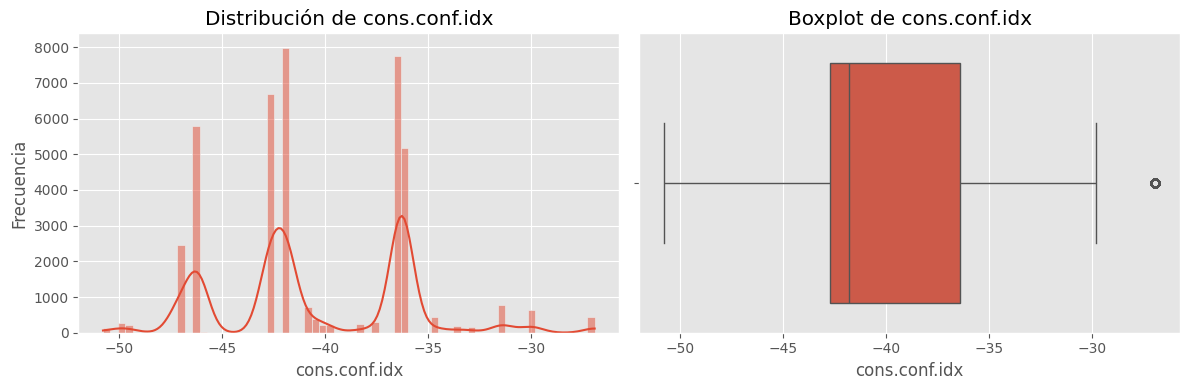

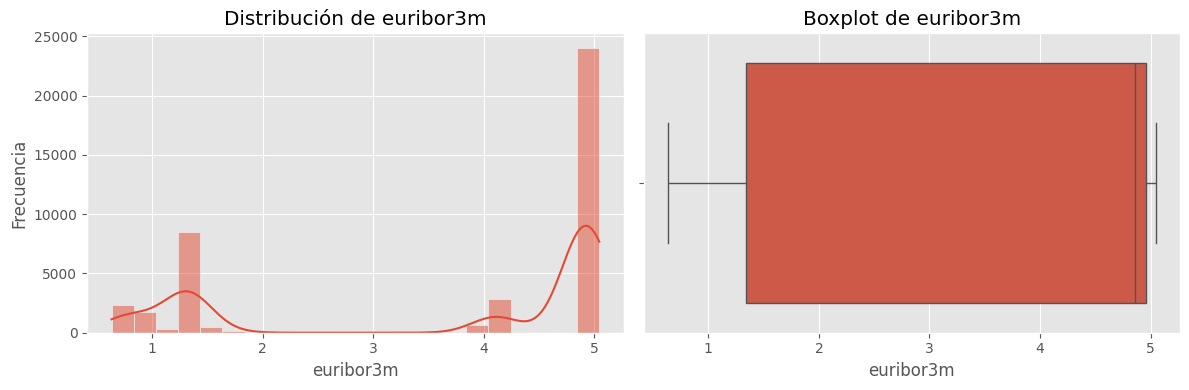

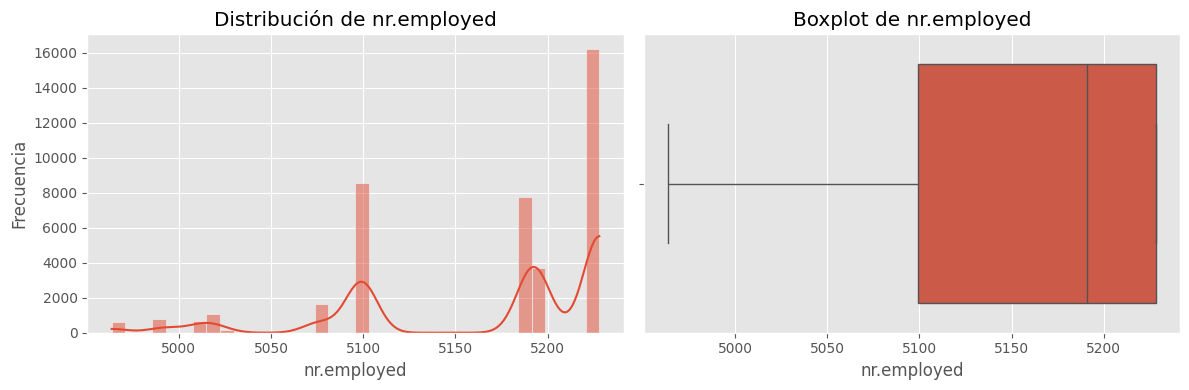

In [8]:
# Seleccionar solo las columnas numéricas
numerical_columns = data.select_dtypes(include=['int64', 'float64']).columns

# Configurar el estilo de las gráficas
plt.style.use('ggplot')

# Histograma y boxplot para cada variable numérica
for col in numerical_columns:
    fig, axes = plt.subplots(1, 2, figsize=(12, 4))
    
    # Histograma
    sns.histplot(data[col], kde=True, ax=axes[0])
    axes[0].set_title(f'Distribución de {col}')
    axes[0].set_xlabel(col)
    axes[0].set_ylabel('Frecuencia')
    
    # Boxplot
    sns.boxplot(x=data[col], ax=axes[1])
    axes[1].set_title(f'Boxplot de {col}')
    axes[1].set_xlabel(col)
    
    plt.tight_layout()
    plt.show()

Histograma: El histograma muestra la distribución de los datos de cada columna. A través de las barras, podemos ver cuántos datos caen dentro de ciertos intervalos (bins). Si la opción kde=True está activada, además del histograma, se verá una línea suave que muestra la densidad de la distribución, lo que facilita la identificación de la forma de la distribución

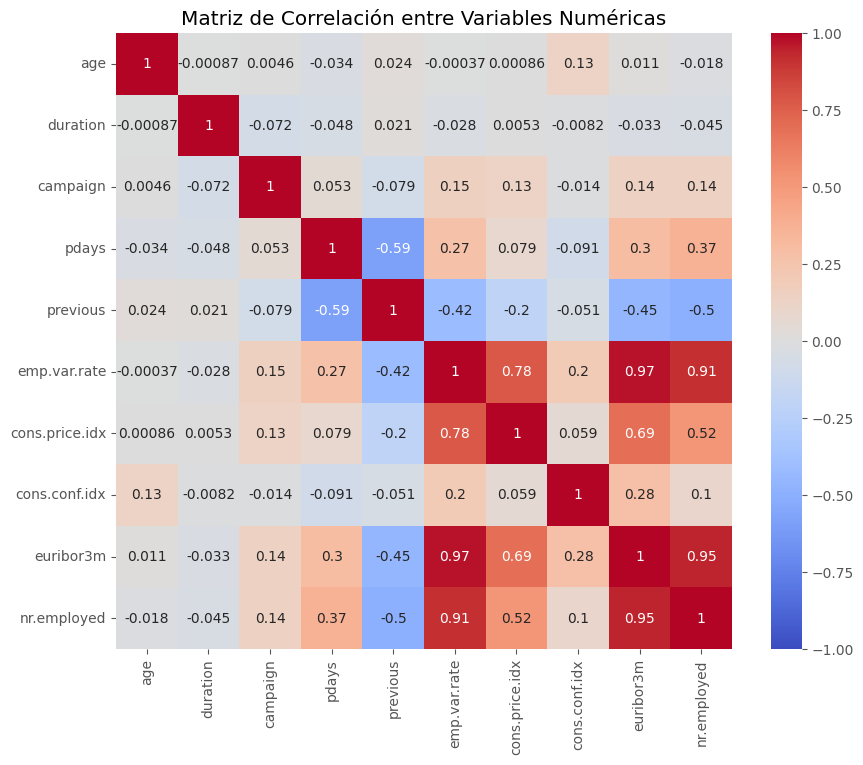

In [9]:
numerical_data = data[numerical_columns]

# Calcular la matriz de correlación
correlation_matrix = numerical_data.corr()

# Graficar el mapa de calor de la matriz de correlación
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, square=True)
plt.title('Matriz de Correlación entre Variables Numéricas')
plt.show()

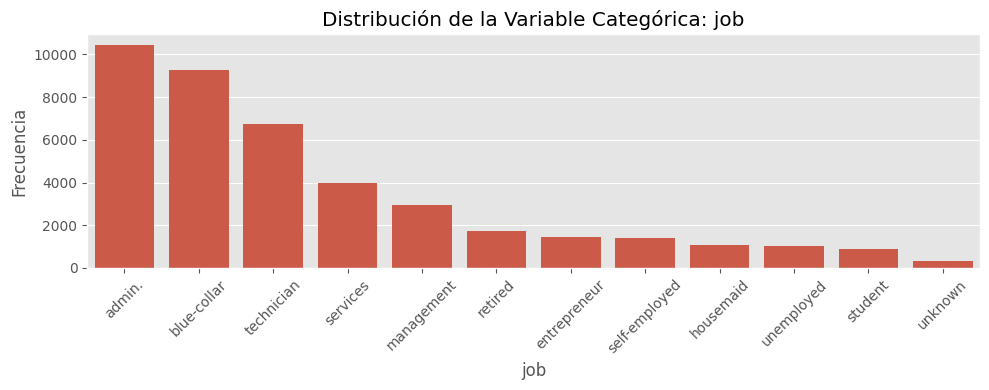

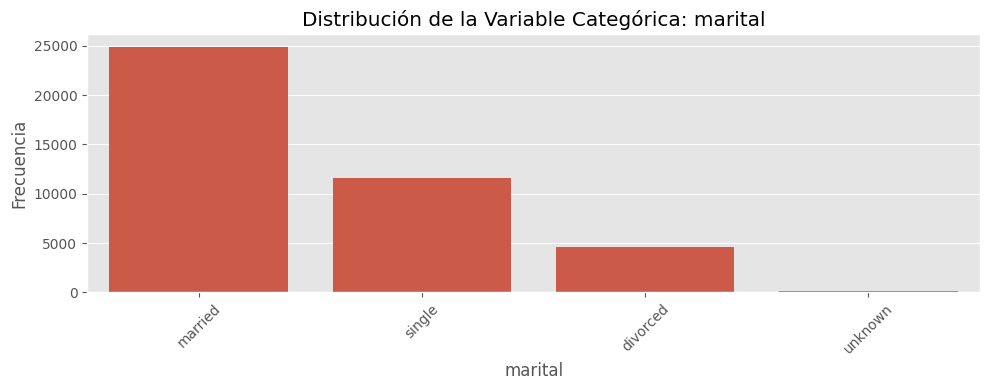

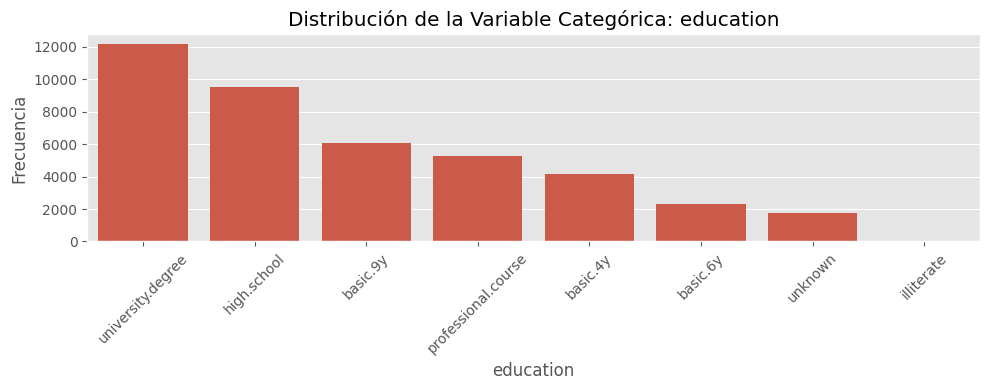

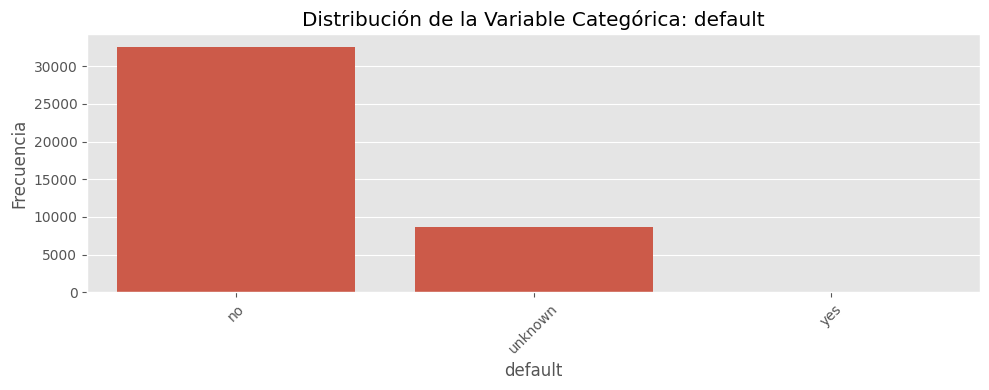

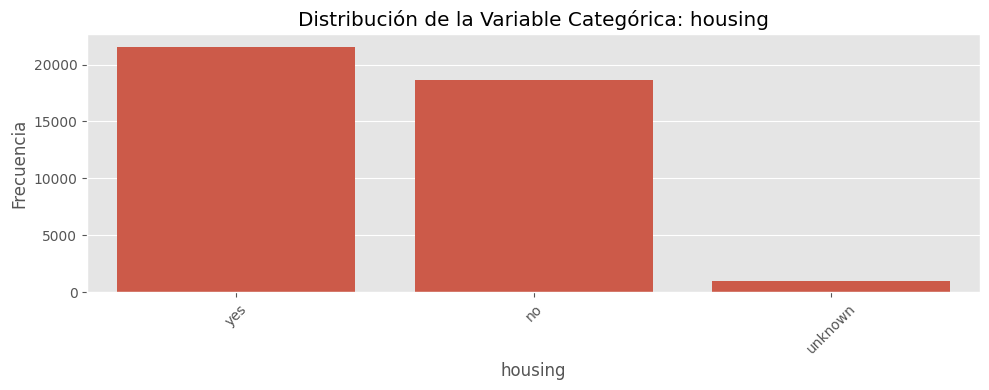

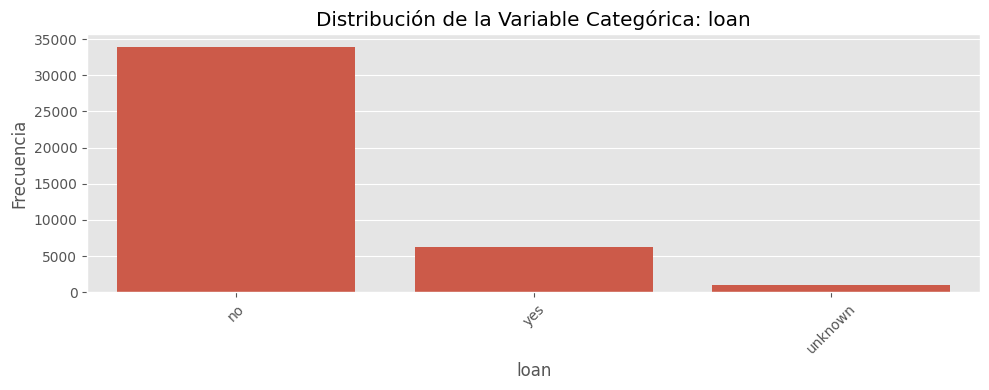

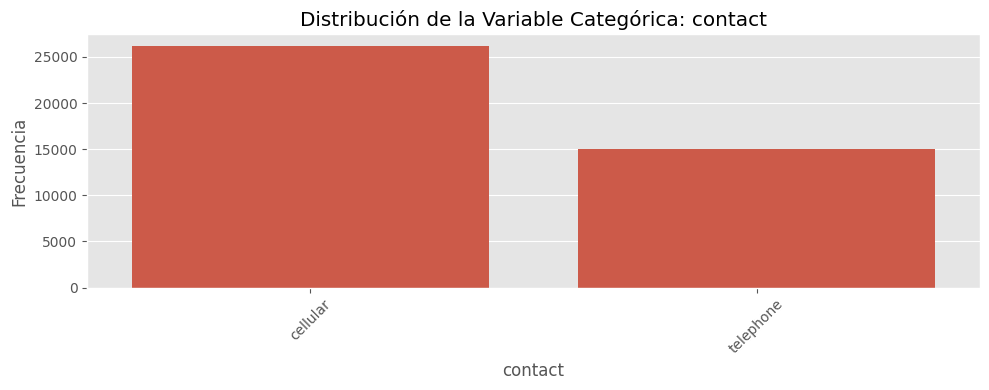

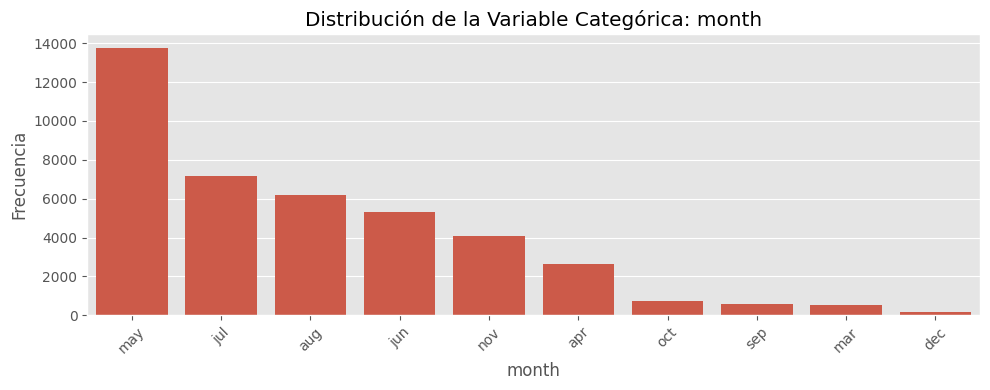

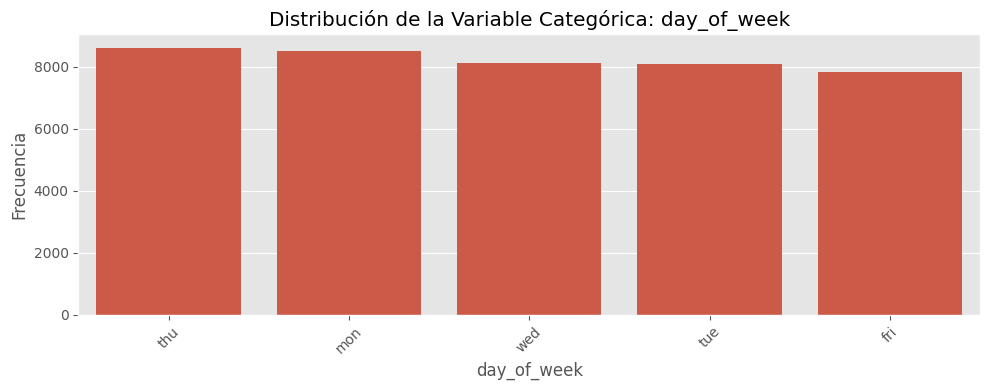

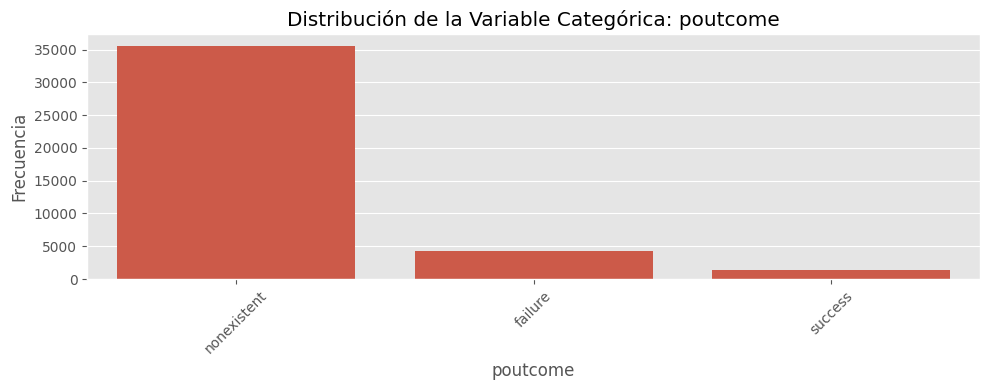

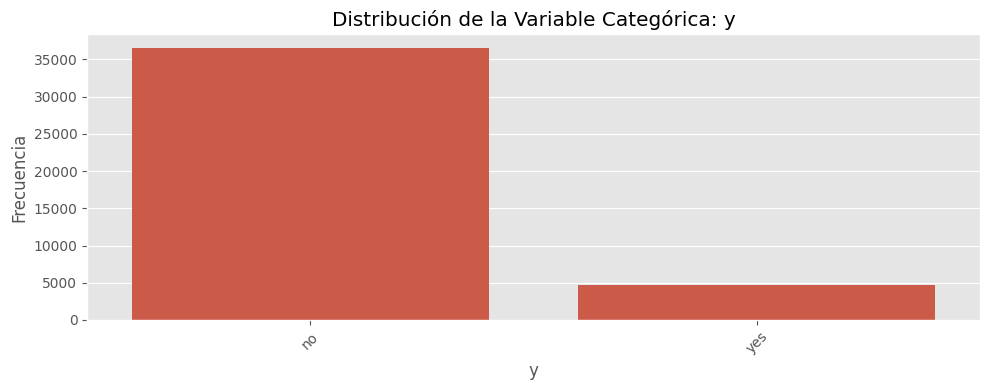

In [10]:
# Seleccionar solo las columnas categóricas
categorical_columns = data.select_dtypes(include=['object']).columns

# Configurar el estilo de las gráficas
plt.style.use('ggplot')

# Gráfico de barras para cada variable categórica
for col in categorical_columns:
    plt.figure(figsize=(10, 4))
    sns.countplot(data=data, x=col, order=data[col].value_counts().index)
    plt.title(f'Distribución de la Variable Categórica: {col}')
    plt.xlabel(col)
    plt.ylabel('Frecuencia')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

In [11]:
# Prueba de normalidad Shapiro-Wilk para cada columna numérica
normality_results = {}
for col in numerical_columns:
    stat, p_value = stats.shapiro(data[col].dropna())
    normality_results[col] = {'Statistic': stat, 'p-value': p_value}

# Mostrar los resultados
normality_df = pd.DataFrame(normality_results).T
print("Resultados de la Prueba de Normalidad Shapiro-Wilk:")
print(normality_df)

# Interpretación de resultados
alpha = 0.05
for col in normality_results:
    if normality_results[col]['p-value'] > alpha:
        print(f"{col}: No se rechaza la hipótesis nula (distribución normal)")
    else:
        print(f"{col}: Se rechaza la hipótesis nula (no sigue una distribución normal)")

Resultados de la Prueba de Normalidad Shapiro-Wilk:
                Statistic        p-value
age              0.957241   5.431944e-73
duration         0.721653  1.801951e-119
campaign         0.557842  9.620737e-133
pdays            0.182971  1.902201e-151
previous         0.391237  2.502841e-142
emp.var.rate     0.762085  3.943143e-115
cons.price.idx   0.933968   9.712494e-83
cons.conf.idx    0.923959   4.866028e-86
euribor3m        0.686265  7.788911e-123
nr.employed      0.787585  4.787435e-112
age: Se rechaza la hipótesis nula (no sigue una distribución normal)
duration: Se rechaza la hipótesis nula (no sigue una distribución normal)
campaign: Se rechaza la hipótesis nula (no sigue una distribución normal)
pdays: Se rechaza la hipótesis nula (no sigue una distribución normal)
previous: Se rechaza la hipótesis nula (no sigue una distribución normal)
emp.var.rate: Se rechaza la hipótesis nula (no sigue una distribución normal)
cons.price.idx: Se rechaza la hipótesis nula (no sigue un

C:\Users\alex_\AppData\Local\Programs\Python\Python312\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 41188.
  res = hypotest_fun_out(*samples, **kwds)


En todos los casos, los p-valores son muy pequeños, lo que implica que se rechaza la hipótesis nula en todos los casos, lo que sugiere que ninguna de las variables (edad, duración de la llamada, número de contactos en la campaña, días desde el último contacto, etc.) sigue una distribución normal

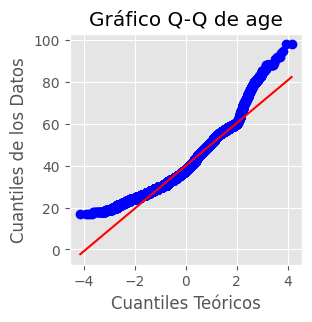

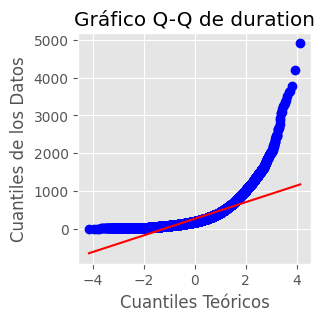

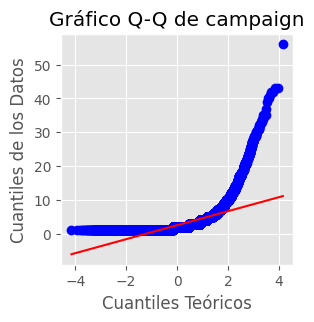

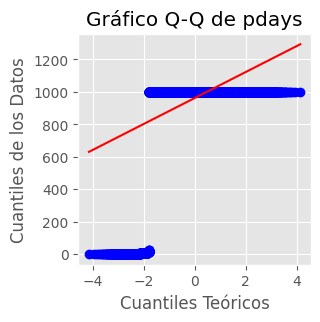

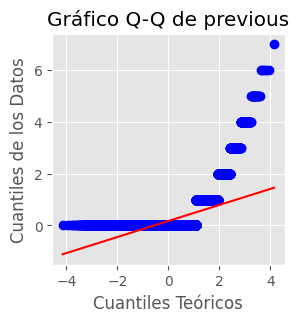

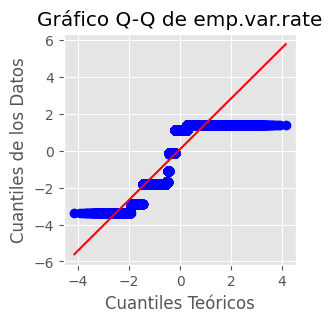

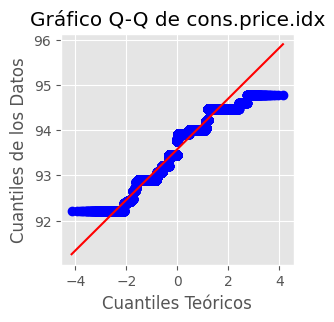

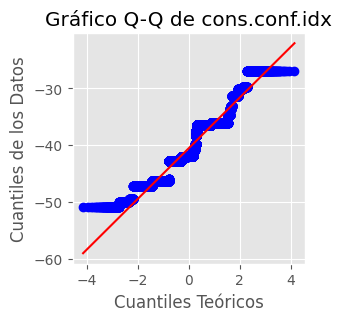

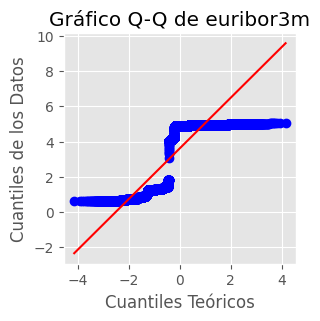

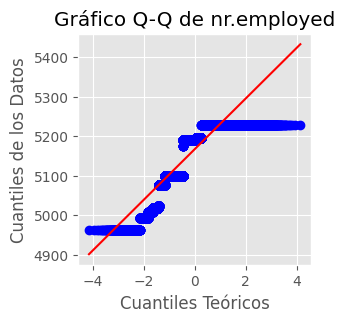

In [12]:
# Crear gráficos Q-Q para cada variable numérica
for col in numerical_columns:
    plt.figure(figsize=(3, 3))
    stats.probplot(data[col].dropna(), dist="norm", plot=plt)
    plt.title(f'Gráfico Q-Q de {col}')
    plt.xlabel('Cuantiles Teóricos')
    plt.ylabel('Cuantiles de los Datos')
    plt.grid(True)
    plt.show()

In [13]:
# Binning de 'age'
data['age_group'] = pd.cut(data['age'], bins=[0, 30, 60, 100], labels=['joven', 'adulto', 'mayor'])

In [14]:
# Log transform en 'balance'
data['log_balance'] = np.log1p(data['cons.price.idx'])  # np.log1p para evitar log(0)

# Crear interacción entre 'balance' y 'loan'
data['balance_loan_interaction'] = data['cons.price.idx'] * data['loan'].apply(lambda x: 1 if x == 'yes' else 0)

In [15]:
data

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,age_group,log_balance,balance_loan_interaction
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,adulto,4.553814,0.000
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,adulto,4.553814,0.000
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,adulto,4.553814,0.000
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,adulto,4.553814,0.000
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,adulto,4.553814,93.994
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes,mayor,4.561918,0.000
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no,adulto,4.561918,0.000
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no,adulto,4.561918,0.000
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes,adulto,4.561918,0.000


In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   age                       41188 non-null  int64   
 1   job                       41188 non-null  object  
 2   marital                   41188 non-null  object  
 3   education                 41188 non-null  object  
 4   default                   41188 non-null  object  
 5   housing                   41188 non-null  object  
 6   loan                      41188 non-null  object  
 7   contact                   41188 non-null  object  
 8   month                     41188 non-null  object  
 9   day_of_week               41188 non-null  object  
 10  duration                  41188 non-null  int64   
 11  campaign                  41188 non-null  int64   
 12  pdays                     41188 non-null  int64   
 13  previous                  41188 non-null  int6

In [17]:
data.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,log_balance,balance_loan_interaction
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911,4.549381,14.193695
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528,0.006125,33.566122
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000,4.534758,0.000000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000,4.544092,0.000000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000,4.551231,0.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000,4.553814,0.000000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000,4.561918,94.767000


In [18]:
# Seleccionar las variables numéricas a transformar con MinMaxScaler, excluyendo age, log_balance, y balance_loan_interaction
numerical_features_to_scale = ['cons.price.idx', 'duration', 'pdays', 'previous', 'duration']

# Aplicar Min-Max Scaling solo a las variables seleccionadas
scaler = MinMaxScaler()
scaled_numerical_data = pd.DataFrame(scaler.fit_transform(data[numerical_features_to_scale]), columns=numerical_features_to_scale)

# Reemplazar -inf y NaN en log_balance con el mínimo valor de log_balance sin -inf ni NaN
min_log_balance = data['log_balance'].replace([-np.inf, np.nan], np.nan).min()


# Agregar log_balance y balance_loan_interaction al dataset de variables numéricas transformadas
scaled_numerical_data['log_balance'] = data['log_balance'].replace([-np.inf, np.nan], min_log_balance)
scaled_numerical_data['balance_loan_interaction'] = data['balance_loan_interaction']

In [19]:
scaled_numerical_data

,cons.price.idx,duration,pdays,previous,duration,log_balance,balance_loan_interaction
0,0.698753,0.053070,1.0,0.000000,0.053070,4.553814,0.000
1,0.698753,0.030297,1.0,0.000000,0.030297,4.553814,0.000
2,0.698753,0.045954,1.0,0.000000,0.045954,4.553814,0.000
3,0.698753,0.030704,1.0,0.000000,0.030704,4.553814,0.000
4,0.698753,0.062424,1.0,0.000000,0.062424,4.553814,93.994
...,...,...,...,...,...,...,...
41183,1.000000,0.067914,1.0,0.000000,0.067914,4.561918,0.000
41184,1.000000,0.077877,1.0,0.000000,0.077877,4.561918,0.000
41185,1.000000,0.038430,1.0,0.000000,0.038430,4.561918,0.000
41186,1.000000,0.089874,1.0,0.000000,0.089874,4.561918,0.000


In [20]:
# Seleccionar variables categóricas, incluyendo age_group
categorical_features = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'duration', 'poutcome', 'age_group']

# Aplicar One-Hot Encoding a las variables categóricas
categorical_data = pd.get_dummies(data[categorical_features], drop_first=True)

In [21]:
categorical_data

,duration,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,...,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_nonexistent,poutcome_success,age_group_adulto,age_group_mayor
0,261,False,False,True,False,False,False,False,False,False,...,False,False,True,False,False,False,True,False,True,False
1,149,False,False,False,False,False,False,True,False,False,...,False,False,True,False,False,False,True,False,True,False
2,226,False,False,False,False,False,False,True,False,False,...,False,False,True,False,False,False,True,False,True,False
3,151,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,True,False,True,False
4,307,False,False,False,False,False,False,True,False,False,...,False,False,True,False,False,False,True,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,334,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,True,False,False,True
41184,383,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,True,False
41185,189,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,True,False,True,False
41186,442,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,True,False,True,False


In [22]:
# Seleccionar la variable objetivo
target = data[['y']]

# Crear el dataset final combinando numéricas, categóricas y la variable objetivo
final_dataset = pd.concat([scaled_numerical_data, categorical_data, target], axis=1)

In [23]:
final_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 54 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   cons.price.idx                 41188 non-null  float64
 1   duration                       41188 non-null  float64
 2   pdays                          41188 non-null  float64
 3   previous                       41188 non-null  float64
 4   duration                       41188 non-null  float64
 5   log_balance                    41188 non-null  float64
 6   balance_loan_interaction       41188 non-null  float64
 7   duration                       41188 non-null  int64  
 8   job_blue-collar                41188 non-null  bool   
 9   job_entrepreneur               41188 non-null  bool   
 10  job_housemaid                  41188 non-null  bool   
 11  job_management                 41188 non-null  bool   
 12  job_retired                    41188 non-null 

In [24]:
# Ver la distribución de la variable objetivo
print("Distribución de la variable objetivo (y):")
print(data['y'].value_counts())

Distribución de la variable objetivo (y):
y
no     36548
yes     4640
Name: count, dtype: int64


In [25]:
# Separar las características (X) y la variable objetivo (y)
X = final_dataset.drop(columns=['y'])
y = final_dataset['y'].apply(lambda x: 1 if x == 'yes' else 0)  # Convertir 'yes' a 1 y 'no' a 0 para SMOTE  # Convertir 'yes' a 1 y 'no' a 0 para SMOTE

In [26]:
# Dividir el dataset en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [27]:
X_train.describe()

,cons.price.idx,duration,pdays,previous,duration,log_balance,balance_loan_interaction,duration
count,32950.000000,32950.000000,32950.000000,32950.000000,32950.000000,32950.000000,32950.000000,32950.000000
mean,0.535807,0.052486,0.963015,0.024960,0.052486,4.549384,14.262810,258.127466
std,0.225724,0.052659,0.188139,0.071289,0.052659,0.006129,33.631927,258.975917
min,0.000000,0.000000,0.000000,0.000000,0.000000,4.534758,0.000000,0.000000
25%,0.340608,0.020943,1.000000,0.000000,0.020943,4.544092,0.000000,103.000000
50%,0.603274,0.036600,1.000000,0.000000,0.036600,4.551231,0.000000,180.000000
75%,0.698753,0.064864,1.000000,0.000000,0.064864,4.553814,0.000000,319.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,4.561918,94.767000,4918.000000


In [28]:
# Aplicar SMOTE solo al conjunto de entrenamiento imputado
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

# Verificar la nueva distribución de la clase en el conjunto de entrenamiento balanceado
print("Distribución después de aplicar SMOTE en el conjunto de entrenamiento:")
print(y_train_balanced.value_counts())

Distribución después de aplicar SMOTE en el conjunto de entrenamiento:
y
0    29238
1    29238
Name: count, dtype: int64


In [29]:
# Entrenar el modelo de Árbol de Decisión
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train_balanced, y_train_balanced)

DecisionTreeClassifier(random_state=42)

In [30]:
# Predecir en el conjunto de prueba
y_pred = clf.predict(X_test)

In [31]:
# Evaluación del modelo
print("Matriz de Confusión:")
print(confusion_matrix(y_test, y_pred))
print("\nReporte de Clasificación:")
print(classification_report(y_test, y_pred))
print("\nExactitud (Accuracy):", accuracy_score(y_test, y_pred))

Matriz de Confusión:
[[6834  476]
 [ 459  469]]

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.94      0.93      0.94      7310
           1       0.50      0.51      0.50       928

    accuracy                           0.89      8238
   macro avg       0.72      0.72      0.72      8238
weighted avg       0.89      0.89      0.89      8238


Exactitud (Accuracy): 0.8865015780529255


El modelo tiene un buen desempeño para la clase 0 (la clase mayoritaria), con alta precisión y recall. Sin embargo, su desempeño para la clase 1 (la clase minoritaria) es más bajo, reflejando que el modelo no está prediciendo correctamente las instancias de esta clase.
Aunque el modelo tiene una exactitud del 89%, esto puede ser engañoso si las clases están desbalanceadas. La alta exactitud se debe principalmente a que el modelo predice bien la clase mayoritaria (0), pero tiene dificultades con la clase minoritaria (1)

In [32]:
# Definir el modelo base
clf = DecisionTreeClassifier(random_state=42)

# Definir los parámetros a evaluar
param_grid = {
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 5, 10],
    'max_features': ['auto', 'sqrt', 'log2', None],
    'criterion': ['gini', 'entropy'],
    'class_weight': [None, 'balanced']
}

# Configurar la búsqueda en cuadrícula
grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, cv=5, scoring='f1', n_jobs=-1, verbose=2)

# Ejecutar la búsqueda
grid_search.fit(X_train_balanced, y_train_balanced)

# Mostrar los mejores parámetros y el mejor puntaje
print("Mejores hiperparámetros:", grid_search.best_params_)
print("Mejor F1-score:", grid_search.best_score_)

Fitting 5 folds for each of 576 candidates, totalling 2880 fits
Mejores hiperparámetros: {'class_weight': 'balanced', 'criterion': 'entropy', 'max_depth': None, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 2}
Mejor F1-score: 0.9149543459828078


C:\Users\alex_\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
720 fits failed out of a total of 2880.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
351 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\alex_\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\alex_\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "C:\Users\alex_\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\bas

In [33]:
# Definir el modelo de árbol de decisión con los mejores hiperparámetros y max_depth=10
clf = DecisionTreeClassifier(
    criterion='entropy',
    max_depth=10,
    max_features='sqrt',
    min_samples_leaf=1,
    min_samples_split=2,
    class_weight='balanced',
    random_state=42
)


In [34]:
# Entrenar el modelo
clf.fit(X_train_balanced, y_train_balanced)


DecisionTreeClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=10, max_features='sqrt', random_state=42)

In [35]:
# Predecir en el conjunto de prueba
y_pred = clf.predict(X_test)

# Evaluación del modelo
print("Matriz de Confusión:")
print(confusion_matrix(y_test, y_pred))
print("\nReporte de Clasificación:")
print(classification_report(y_test, y_pred))
print("\nExactitud (Accuracy):", accuracy_score(y_test, y_pred))

Matriz de Confusión:
[[6698  612]
 [ 338  590]]

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.95      0.92      0.93      7310
           1       0.49      0.64      0.55       928

    accuracy                           0.88      8238
   macro avg       0.72      0.78      0.74      8238
weighted avg       0.90      0.88      0.89      8238


Exactitud (Accuracy): 0.8846807477543093


El modelo tiene un desempeño significativamente mejor en la clase 0, con una alta precisión y recuperación. Sin embargo, para la clase 1, la precisión es baja, pero la recuperación es más alta. Esto sugiere que el modelo es bueno para identificar algunas instancias de la clase 1, pero comete muchos falsos positivos.
La exactitud de 88% muestra que, globalmente, el modelo tiene un buen desempeño, pero no refleja de manera equitativa las dificultades del modelo con la clase minoritaria.

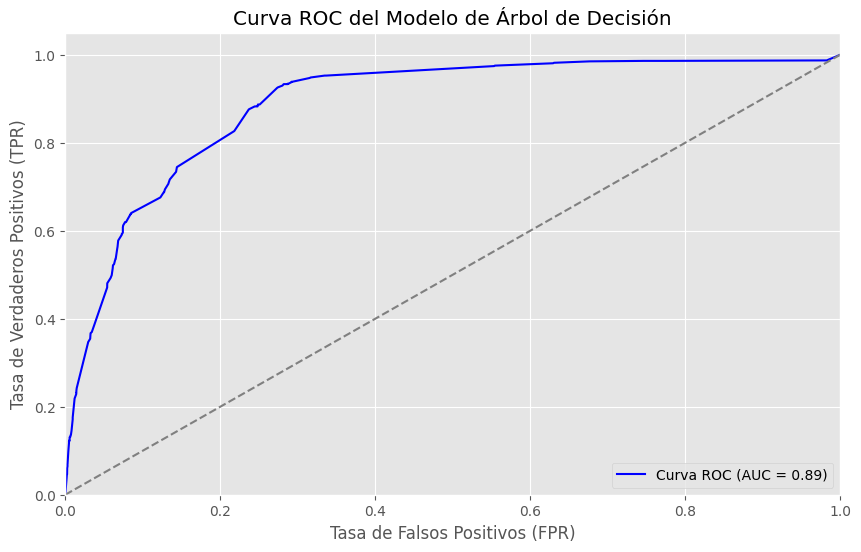

In [36]:
# Obtener las probabilidades de predicción para la clase positiva
y_pred_proba = clf.predict_proba(X_test)[:, 1]

# Calcular la Curva ROC y AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

# Graficar la Curva ROC
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='blue', label=f'Curva ROC (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Línea de referencia
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.title('Curva ROC del Modelo de Árbol de Decisión')
plt.legend(loc="lower right")
plt.show()

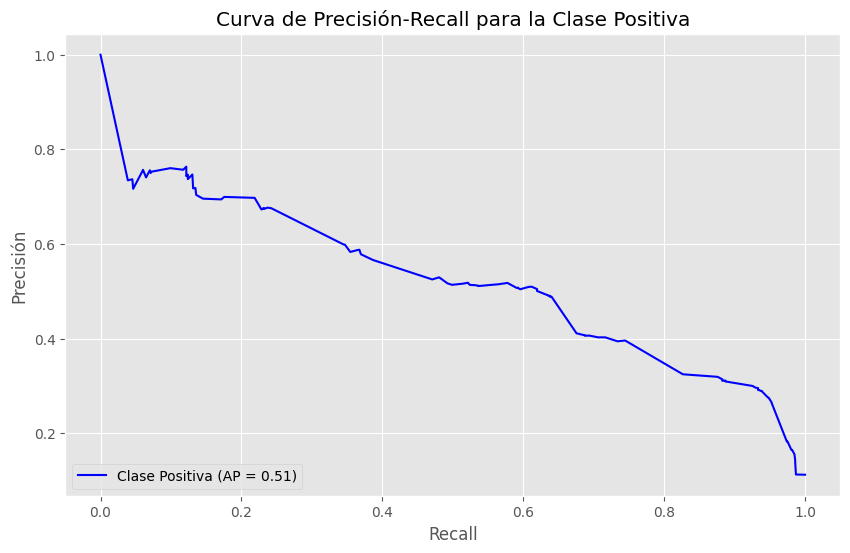

In [37]:
# Obtener las probabilidades de predicción para la clase positiva
y_pred_proba = clf.predict_proba(X_test)[:, 1]

# Calcular la curva de precisión-recall y AUC para la clase positiva (y = 1)
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_proba)
average_precision = average_precision_score(y_test, y_pred_proba)

# Graficar la curva de precisión-recall para la clase positiva
plt.figure(figsize=(10, 6))
plt.plot(recall, precision, color='blue', label=f'Clase Positiva (AP = {average_precision:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precisión')
plt.title('Curva de Precisión-Recall para la Clase Positiva')
plt.legend(loc="lower left")
plt.show()

## RANDOM FOREST

In [38]:
# Importación de bibliotecas necesarias
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

In [39]:
# Creación del modelo Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Entrenamiento del modelo con los datos balanceados
rf_model.fit(X_train_balanced, y_train_balanced)

RandomForestClassifier(random_state=42)

In [40]:
# Predicción en el conjunto de prueba
y_pred = rf_model.predict(X_test)

# Evaluación del modelo
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9121145909201263

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.95      0.95      7310
           1       0.61      0.62      0.61       928

    accuracy                           0.91      8238
   macro avg       0.78      0.78      0.78      8238
weighted avg       0.91      0.91      0.91      8238



El modelo tiene una accuracy de 91.2%, lo que indica que, en general, realiza correctamente el 91.2% de las predicciones. Sin embargo, este valor debe ser analizado con cautela, especialmente en un problema de clasificación desbalanceada, como parece ser este caso, debido a la diferencia en el número de instancias entre las dos clases (0 y 1).

In [41]:
# Cálculo de la curva ROC y AUC
y_pred_proba = rf_model.predict_proba(X_test)[:, 1] 
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

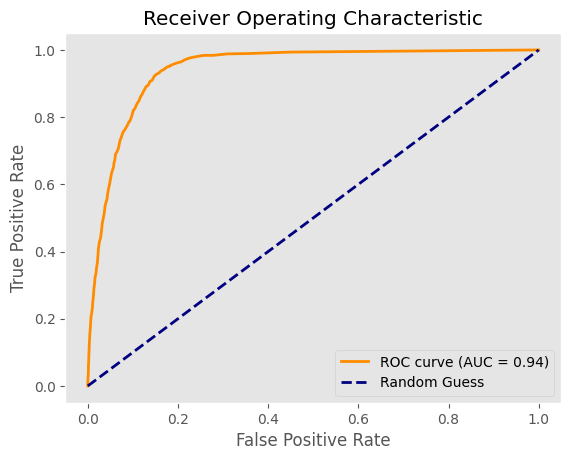

In [42]:
# Graficar la curva ROC
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.grid()
plt.show()

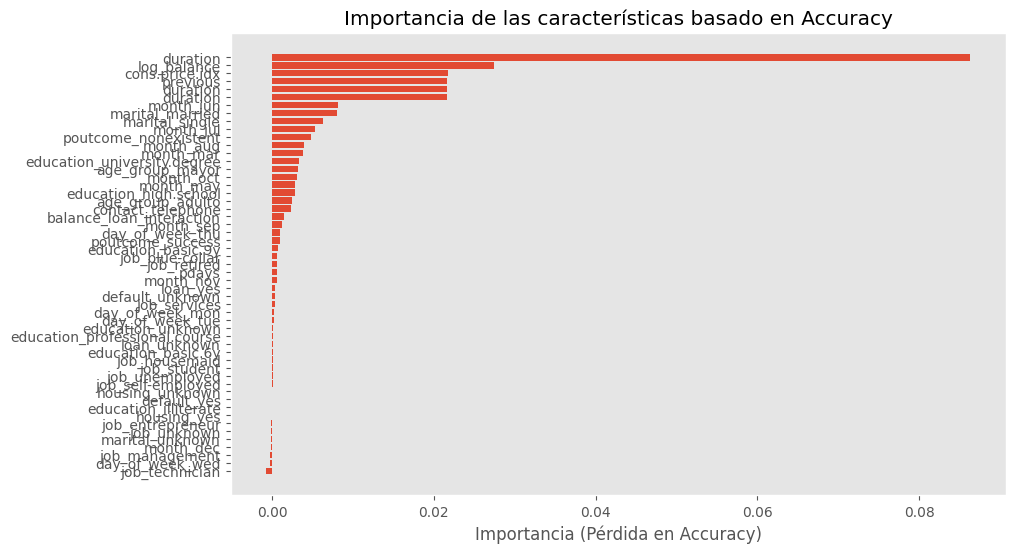

In [43]:
from sklearn.inspection import permutation_importance
import numpy as np

# Calcular la importancia de las características basado en la pérdida de Accuracy
perm_importance = permutation_importance(rf_model, X_test, y_test, scoring='accuracy', random_state=42)

# Ordenar características por importancia
sorted_idx = perm_importance.importances_mean.argsort()

# Graficar la importancia
plt.figure(figsize=(10, 6))
plt.barh(range(X_test.shape[1]), perm_importance.importances_mean[sorted_idx], align='center')
plt.yticks(range(X_test.shape[1]), np.array(X.columns)[sorted_idx])
plt.xlabel("Importancia (Pérdida en Accuracy)")
plt.title("Importancia de las características basado en Accuracy")
plt.grid()
plt.show()

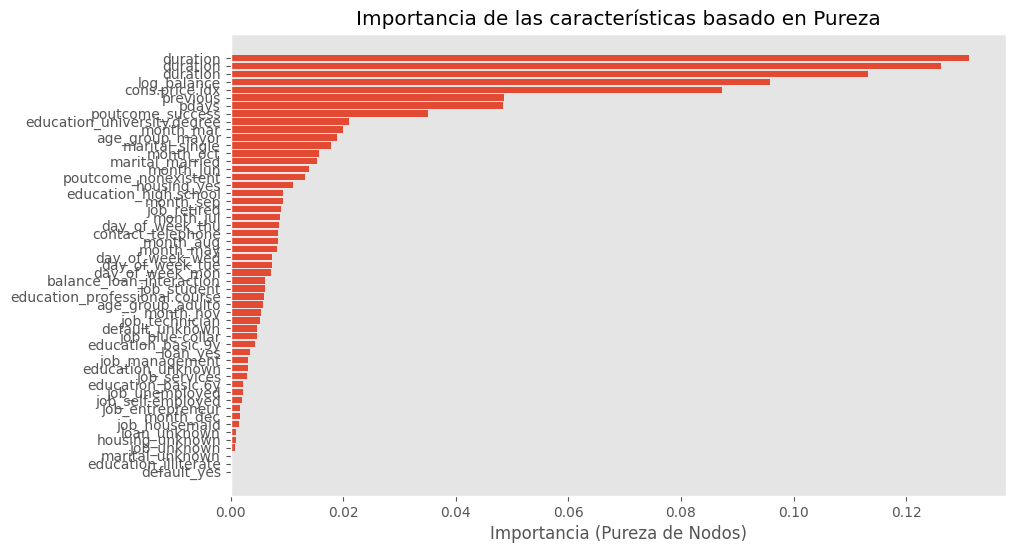

In [44]:
# Importancia de las características basado en la pureza de los nodos
feature_importances = rf_model.feature_importances_

# Ordenar características por importancia
sorted_idx = np.argsort(feature_importances)

# Graficar la importancia
plt.figure(figsize=(10, 6))
plt.barh(range(X_train.shape[1]), feature_importances[sorted_idx], align='center')
plt.yticks(range(X_train.shape[1]), np.array(X.columns)[sorted_idx])
plt.xlabel("Importancia (Pureza de Nodos)")
plt.title("Importancia de las características basado en Pureza")
plt.grid()
plt.show()

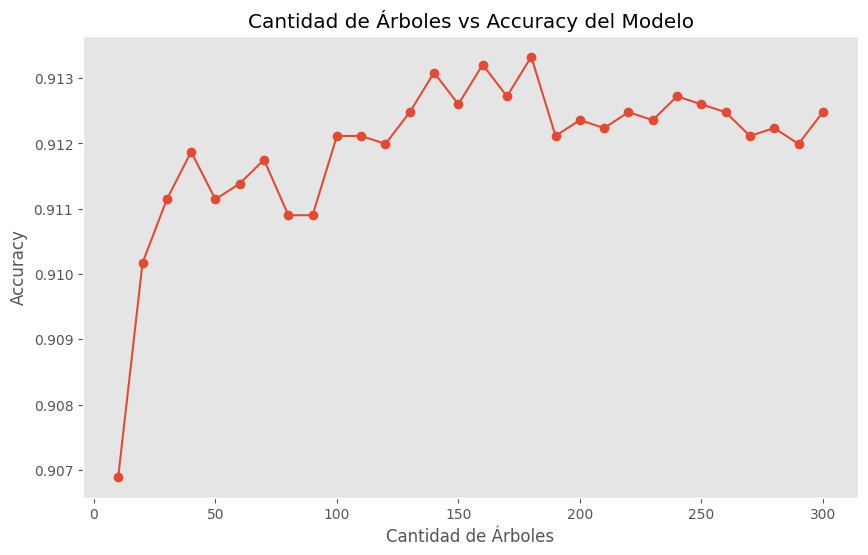

In [45]:
# Importación de bibliotecas necesarias
#from sklearn.ensemble import RandomForestClassifier
#from sklearn.metrics import accuracy_score

# Listas para guardar el número de árboles y la precisión correspondiente
num_trees = list(range(10, 310, 10))  # De 10 a 200 árboles, incrementos de 10
accuracies = []

# Iterar sobre diferentes números de árboles
for n in num_trees:
    rf_model = RandomForestClassifier(n_estimators=n, random_state=42)
    rf_model.fit(X_train_balanced, y_train_balanced)  # Entrenamiento del modelo
    y_pred = rf_model.predict(X_test)  # Predicción en el conjunto de prueba
    acc = accuracy_score(y_test, y_pred)  # Cálculo de accuracy
    accuracies.append(acc)

# Graficar la relación cantidad de árboles vs accuracy
plt.figure(figsize=(10, 6))
plt.plot(num_trees, accuracies, marker='o')
plt.xlabel("Cantidad de Árboles")
plt.ylabel("Accuracy")
plt.title("Cantidad de Árboles vs Accuracy del Modelo")
plt.grid()
plt.show()

In [46]:
from sklearn.tree import export_text

# Seleccionar un árbol del bosque
tree_id = 90  # Cambia el índice para explorar diferentes árboles
single_tree = rf_model.estimators_[tree_id]

# Exportar las reglas del árbol como texto
tree_rules = export_text(single_tree, feature_names=list(X_train.columns))
print(f"Árbol de decisión #{tree_id}:\n")
print(tree_rules)

Árbol de decisión #90:

|--- duration <= 0.05
|   |--- job_retired <= 0.50
|   |   |--- cons.price.idx <= 0.27
|   |   |   |--- housing_yes <= 0.50
|   |   |   |   |--- duration <= 0.04
|   |   |   |   |   |--- previous <= 0.00
|   |   |   |   |   |   |--- log_balance <= 4.54
|   |   |   |   |   |   |   |--- month_sep <= 0.50
|   |   |   |   |   |   |   |   |--- job_management <= 0.50
|   |   |   |   |   |   |   |   |   |--- education_high.school <= 0.50
|   |   |   |   |   |   |   |   |   |   |--- duration <= 0.02
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 2
|   |   |   |   |   |   |   |   |   |   |--- duration >  0.02
|   |   |   |   |   |   |   |   |   |   |   |--- class: 0.0
|   |   |   |   |   |   |   |   |   |--- education_high.school >  0.50
|   |   |   |   |   |   |   |   |   |   |--- class: 0.0
|   |   |   |   |   |   |   |   |--- job_management >  0.50
|   |   |   |   |   |   |   |   |   |--- class: 0.0
|   |   |   |   |   |   |   |--- month_se

In [47]:
from datetime import datetime
from sklearn.tree import DecisionTreeClassifier

# Registrar el inicio y el fin del entrenamiento
start_time = datetime.now()

# Entrenar el modelo de Árbol de Decisión
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train_balanced, y_train_balanced)

end_time = datetime.now()
elapsed_time = end_time - start_time

print(f"Tiempo de entrenamiento: {elapsed_time}")

Tiempo de entrenamiento: 0:00:00.527927


In [48]:
from datetime import datetime
from sklearn.tree import DecisionTreeClassifier

# Registrar el inicio y el fin del entrenamiento
start_time = datetime.now()

# Entrenar el modelo de Árbol de Decisión
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train_balanced, y_train_balanced)

end_time = datetime.now()
elapsed_time = end_time - start_time

print(f"Tiempo de entrenamiento: {elapsed_time}")


Tiempo de entrenamiento: 0:00:00.549382


In [49]:
import psutil
from datetime import datetime
from sklearn.tree import DecisionTreeClassifier

# Obtener el proceso actual
process = psutil.Process()

# Medir uso de CPU por el proceso actual
start_time = datetime.now()
cpu_usage_before = process.cpu_percent(interval=None)

# Entrenar el modelo
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train_balanced, y_train_balanced)

cpu_usage_after = process.cpu_percent(interval=None)
end_time = datetime.now()

# Calcular resultados
elapsed_time = end_time - start_time
cpu_usage_difference = cpu_usage_after - cpu_usage_before

print(f"Tiempo de entrenamiento: {elapsed_time}")
print(f"Uso de CPU por este proceso: {cpu_usage_difference}%")

Tiempo de entrenamiento: 0:00:00.535115
Uso de CPU por este proceso: 99.9%


In [50]:
import psutil
from datetime import datetime
from sklearn.ensemble import RandomForestClassifier

# Obtener el proceso actual
process = psutil.Process()

# Medir uso de CPU por el proceso actual
start_time = datetime.now()
cpu_usage_before = process.cpu_percent(interval=None)

# Entrenar el modelo Random Forest
rf_model = RandomForestClassifier(n_estimators=500, random_state=42)
rf_model.fit(X_train_balanced, y_train_balanced)

cpu_usage_after = process.cpu_percent(interval=None)
end_time = datetime.now()

# Calcular resultados
elapsed_time = end_time - start_time
cpu_usage_difference = cpu_usage_after - cpu_usage_before

print(f"Tiempo de entrenamiento: {elapsed_time}")
print(f"Uso de CPU por este proceso: {cpu_usage_difference}%")

Tiempo de entrenamiento: 0:00:32.188831
Uso de CPU por este proceso: 98.3%


## XGBoost

In [51]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report

In [52]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [53]:
import warnings
# Ignorar todos los warnings
warnings.filterwarnings('ignore')

In [54]:
import numpy as np

X_train_balanced = np.array(X_train_balanced)
y_train_balanced = np.array(y_train_balanced)
X_test = np.array(X_test)

In [55]:
# Entrenar el modelo XGBoost
xgb_model = XGBClassifier(n_estimators=500, random_state=42, use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(X_train_balanced, y_train_balanced)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=500,
              n_jobs=None, num_parallel_tree=None, random_state=42, ...)

In [56]:
# Predicciones en el conjunto de prueba
y_pred = xgb_model.predict(X_test)

# Evaluación del modelo
print("Accuracy del modelo:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy del modelo: 0.9092012624423403

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.95      0.95      7310
           1       0.61      0.55      0.58       928

    accuracy                           0.91      8238
   macro avg       0.78      0.75      0.76      8238
weighted avg       0.91      0.91      0.91      8238



El modelo tiene un excelente desempeño en la clase 0, con alta precisión (0.94) y recuperación (0.95), lo que lo convierte en un modelo muy efectivo para predecir la clase mayoritaria.
El desempeño en la clase 1 es más débil, con precisión (0.61) y recuperación (0.55) más bajas. Esto sugiere que el modelo tiene dificultades para identificar correctamente las instancias de la clase 1 y, aunque no tiene una cantidad masiva de falsos positivos, comete una cantidad considerable de falsos negativos (instancias de clase 1 clasificadas como clase 0).

[0]	validation_0-auc:0.94139	validation_1-auc:0.89221
[1]	validation_0-auc:0.95825	validation_1-auc:0.91776
[2]	validation_0-auc:0.96508	validation_1-auc:0.92596
[3]	validation_0-auc:0.96879	validation_1-auc:0.93022
[4]	validation_0-auc:0.97250	validation_1-auc:0.93290
[5]	validation_0-auc:0.97570	validation_1-auc:0.93561
[6]	validation_0-auc:0.97769	validation_1-auc:0.93595
[7]	validation_0-auc:0.98045	validation_1-auc:0.93763
[8]	validation_0-auc:0.98241	validation_1-auc:0.93761
[9]	validation_0-auc:0.98433	validation_1-auc:0.93732
[10]	validation_0-auc:0.98515	validation_1-auc:0.93842
[11]	validation_0-auc:0.98640	validation_1-auc:0.93816
[12]	validation_0-auc:0.98718	validation_1-auc:0.93837
[13]	validation_0-auc:0.98792	validation_1-auc:0.93876
[14]	validation_0-auc:0.98886	validation_1-auc:0.93964
[15]	validation_0-auc:0.98927	validation_1-auc:0.94013
[16]	validation_0-auc:0.98969	validation_1-auc:0.93999
[17]	validation_0-auc:0.98990	validation_1-auc:0.94061
[18]	validation_0-au

[148]	validation_0-auc:0.99730	validation_1-auc:0.94409
[149]	validation_0-auc:0.99732	validation_1-auc:0.94403
[150]	validation_0-auc:0.99734	validation_1-auc:0.94385
[151]	validation_0-auc:0.99735	validation_1-auc:0.94387
[152]	validation_0-auc:0.99737	validation_1-auc:0.94386
[153]	validation_0-auc:0.99738	validation_1-auc:0.94387
[154]	validation_0-auc:0.99739	validation_1-auc:0.94377
[155]	validation_0-auc:0.99740	validation_1-auc:0.94382
[156]	validation_0-auc:0.99742	validation_1-auc:0.94385
[157]	validation_0-auc:0.99743	validation_1-auc:0.94379
[158]	validation_0-auc:0.99744	validation_1-auc:0.94372
[159]	validation_0-auc:0.99746	validation_1-auc:0.94371
[160]	validation_0-auc:0.99747	validation_1-auc:0.94370
[161]	validation_0-auc:0.99749	validation_1-auc:0.94374
[162]	validation_0-auc:0.99750	validation_1-auc:0.94366
[163]	validation_0-auc:0.99751	validation_1-auc:0.94362
[164]	validation_0-auc:0.99754	validation_1-auc:0.94361
[165]	validation_0-auc:0.99756	validation_1-auc:

[294]	validation_0-auc:0.99899	validation_1-auc:0.94103
[295]	validation_0-auc:0.99900	validation_1-auc:0.94098
[296]	validation_0-auc:0.99901	validation_1-auc:0.94083
[297]	validation_0-auc:0.99902	validation_1-auc:0.94067
[298]	validation_0-auc:0.99902	validation_1-auc:0.94071
[299]	validation_0-auc:0.99902	validation_1-auc:0.94070
[300]	validation_0-auc:0.99902	validation_1-auc:0.94073
[301]	validation_0-auc:0.99903	validation_1-auc:0.94080
[302]	validation_0-auc:0.99904	validation_1-auc:0.94081
[303]	validation_0-auc:0.99904	validation_1-auc:0.94079
[304]	validation_0-auc:0.99905	validation_1-auc:0.94075
[305]	validation_0-auc:0.99905	validation_1-auc:0.94076
[306]	validation_0-auc:0.99905	validation_1-auc:0.94067
[307]	validation_0-auc:0.99906	validation_1-auc:0.94073
[308]	validation_0-auc:0.99906	validation_1-auc:0.94069
[309]	validation_0-auc:0.99906	validation_1-auc:0.94064
[310]	validation_0-auc:0.99906	validation_1-auc:0.94058
[311]	validation_0-auc:0.99907	validation_1-auc:

[440]	validation_0-auc:0.99956	validation_1-auc:0.93747
[441]	validation_0-auc:0.99956	validation_1-auc:0.93747
[442]	validation_0-auc:0.99956	validation_1-auc:0.93745
[443]	validation_0-auc:0.99957	validation_1-auc:0.93741
[444]	validation_0-auc:0.99957	validation_1-auc:0.93739
[445]	validation_0-auc:0.99957	validation_1-auc:0.93738
[446]	validation_0-auc:0.99958	validation_1-auc:0.93736
[447]	validation_0-auc:0.99959	validation_1-auc:0.93732
[448]	validation_0-auc:0.99959	validation_1-auc:0.93732
[449]	validation_0-auc:0.99960	validation_1-auc:0.93723
[450]	validation_0-auc:0.99960	validation_1-auc:0.93723
[451]	validation_0-auc:0.99960	validation_1-auc:0.93718
[452]	validation_0-auc:0.99960	validation_1-auc:0.93713
[453]	validation_0-auc:0.99961	validation_1-auc:0.93738
[454]	validation_0-auc:0.99961	validation_1-auc:0.93735
[455]	validation_0-auc:0.99961	validation_1-auc:0.93738
[456]	validation_0-auc:0.99961	validation_1-auc:0.93736
[457]	validation_0-auc:0.99961	validation_1-auc:

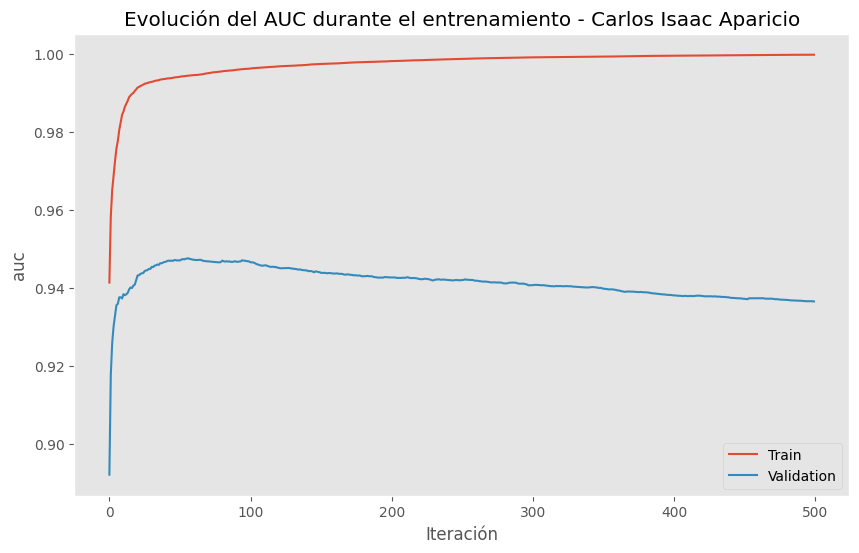

In [57]:
from xgboost import XGBClassifier
import matplotlib.pyplot as plt

# Definir conjuntos de entrenamiento y validación
eval_set = [(X_train_balanced, y_train_balanced), (X_test, y_test)]

# Entrenar el modelo XGBoost con seguimiento
xgb_model = XGBClassifier(n_estimators=500, random_state=42, use_label_encoder=False, eval_metric='auc')
xgb_model.fit(X_train_balanced, y_train_balanced, eval_set=eval_set, verbose=True)

# Graficar la evolución de la métrica de evaluación
results = xgb_model.evals_result()
epochs = len(results['validation_0']['auc'])
x_axis = range(0, epochs)

plt.figure(figsize=(10, 6))
plt.plot(x_axis, results['validation_0']['auc'], label='Train')
plt.plot(x_axis, results['validation_1']['auc'], label='Validation')
plt.xlabel('Iteración')
plt.ylabel('auc')
plt.title('Evolución del AUC durante el entrenamiento - Carlos Isaac Aparicio')
plt.legend()
plt.grid()
plt.show()

[0]	validation_0-logloss:0.52545	validation_1-logloss:0.53432
[1]	validation_0-logloss:0.43153	validation_1-logloss:0.44544
[2]	validation_0-logloss:0.36750	validation_1-logloss:0.38848
[3]	validation_0-logloss:0.32613	validation_1-logloss:0.35050
[4]	validation_0-logloss:0.29091	validation_1-logloss:0.31997
[5]	validation_0-logloss:0.26491	validation_1-logloss:0.29724
[6]	validation_0-logloss:0.24738	validation_1-logloss:0.28221
[7]	validation_0-logloss:0.22754	validation_1-logloss:0.26526
[8]	validation_0-logloss:0.21280	validation_1-logloss:0.25304
[9]	validation_0-logloss:0.20064	validation_1-logloss:0.24391
[10]	validation_0-logloss:0.19151	validation_1-logloss:0.23584
[11]	validation_0-logloss:0.18237	validation_1-logloss:0.22906
[12]	validation_0-logloss:0.17450	validation_1-logloss:0.22301
[13]	validation_0-logloss:0.16837	validation_1-logloss:0.21877
[14]	validation_0-logloss:0.16010	validation_1-logloss:0.21251
[15]	validation_0-logloss:0.15579	validation_1-logloss:0.20916
[1

[130]	validation_0-logloss:0.07461	validation_1-logloss:0.18145
[131]	validation_0-logloss:0.07447	validation_1-logloss:0.18164
[132]	validation_0-logloss:0.07425	validation_1-logloss:0.18160
[133]	validation_0-logloss:0.07393	validation_1-logloss:0.18183
[134]	validation_0-logloss:0.07381	validation_1-logloss:0.18194
[135]	validation_0-logloss:0.07367	validation_1-logloss:0.18191
[136]	validation_0-logloss:0.07351	validation_1-logloss:0.18203
[137]	validation_0-logloss:0.07330	validation_1-logloss:0.18221
[138]	validation_0-logloss:0.07306	validation_1-logloss:0.18219
[139]	validation_0-logloss:0.07274	validation_1-logloss:0.18230
[140]	validation_0-logloss:0.07260	validation_1-logloss:0.18227
[141]	validation_0-logloss:0.07230	validation_1-logloss:0.18271
[142]	validation_0-logloss:0.07185	validation_1-logloss:0.18262
[143]	validation_0-logloss:0.07153	validation_1-logloss:0.18260
[144]	validation_0-logloss:0.07139	validation_1-logloss:0.18288
[145]	validation_0-logloss:0.07114	valid

[259]	validation_0-logloss:0.05338	validation_1-logloss:0.19252
[260]	validation_0-logloss:0.05329	validation_1-logloss:0.19257
[261]	validation_0-logloss:0.05322	validation_1-logloss:0.19265
[262]	validation_0-logloss:0.05316	validation_1-logloss:0.19286
[263]	validation_0-logloss:0.05305	validation_1-logloss:0.19296
[264]	validation_0-logloss:0.05302	validation_1-logloss:0.19309
[265]	validation_0-logloss:0.05286	validation_1-logloss:0.19324
[266]	validation_0-logloss:0.05269	validation_1-logloss:0.19332
[267]	validation_0-logloss:0.05253	validation_1-logloss:0.19346
[268]	validation_0-logloss:0.05241	validation_1-logloss:0.19355
[269]	validation_0-logloss:0.05228	validation_1-logloss:0.19374
[270]	validation_0-logloss:0.05220	validation_1-logloss:0.19386
[271]	validation_0-logloss:0.05207	validation_1-logloss:0.19403
[272]	validation_0-logloss:0.05198	validation_1-logloss:0.19399
[273]	validation_0-logloss:0.05183	validation_1-logloss:0.19417
[274]	validation_0-logloss:0.05165	valid

[388]	validation_0-logloss:0.04136	validation_1-logloss:0.20543
[389]	validation_0-logloss:0.04129	validation_1-logloss:0.20559
[390]	validation_0-logloss:0.04120	validation_1-logloss:0.20570
[391]	validation_0-logloss:0.04117	validation_1-logloss:0.20577
[392]	validation_0-logloss:0.04111	validation_1-logloss:0.20594
[393]	validation_0-logloss:0.04102	validation_1-logloss:0.20600
[394]	validation_0-logloss:0.04093	validation_1-logloss:0.20623
[395]	validation_0-logloss:0.04089	validation_1-logloss:0.20627
[396]	validation_0-logloss:0.04082	validation_1-logloss:0.20647
[397]	validation_0-logloss:0.04072	validation_1-logloss:0.20664
[398]	validation_0-logloss:0.04059	validation_1-logloss:0.20673
[399]	validation_0-logloss:0.04052	validation_1-logloss:0.20705
[400]	validation_0-logloss:0.04043	validation_1-logloss:0.20704
[401]	validation_0-logloss:0.04029	validation_1-logloss:0.20721
[402]	validation_0-logloss:0.04017	validation_1-logloss:0.20732
[403]	validation_0-logloss:0.04003	valid

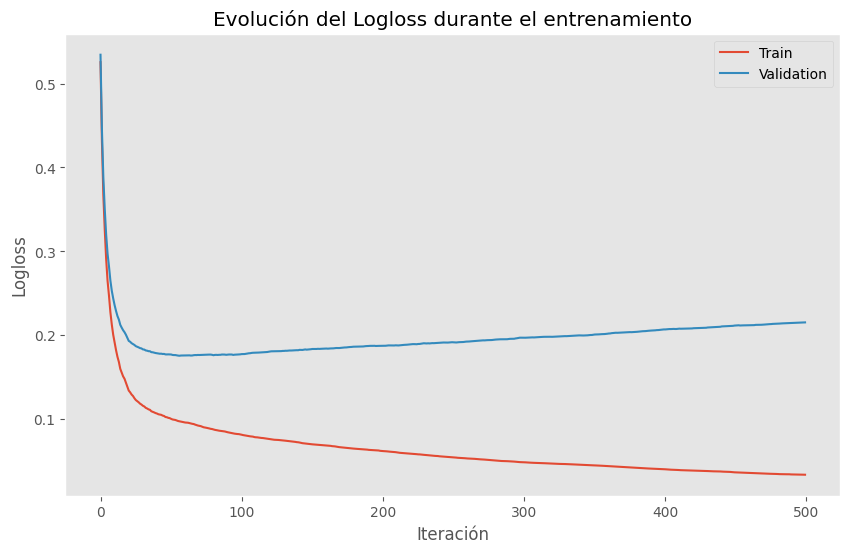

In [58]:
from xgboost import XGBClassifier
import matplotlib.pyplot as plt

# Definir conjuntos de entrenamiento y validación
eval_set = [(X_train_balanced, y_train_balanced), (X_test, y_test)]

# Entrenar el modelo XGBoost con seguimiento
xgb_model = XGBClassifier(n_estimators=500, random_state=42, use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(X_train_balanced, y_train_balanced, eval_set=eval_set, verbose=True)

# Graficar la evolución de la métrica de evaluación
results = xgb_model.evals_result()
epochs = len(results['validation_0']['logloss'])
x_axis = range(0, epochs)

plt.figure(figsize=(10, 6))
plt.plot(x_axis, results['validation_0']['logloss'], label='Train')
plt.plot(x_axis, results['validation_1']['logloss'], label='Validation')
plt.xlabel('Iteración')
plt.ylabel('Logloss')
plt.title('Evolución del Logloss durante el entrenamiento')
plt.legend()
plt.grid()
plt.show()